### Objective
- Validate the final model’s reliability
- Analyze feature importance
- Identify high-risk customers
- Provide actionable business recommendations

In [16]:
# Load necessary libraries
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [9]:
# Load cleaned dataset
X_train = pd.read_csv(r"D:\Bank_Churn_Project\data\X_train_prepared.csv")
y_train = pd.read_csv(r"D:\Bank_Churn_Project\data\y_train.csv")
X_test = pd.read_csv(r"D:\Bank_Churn_Project\data\X_test_prepared.csv")
y_test = pd.read_csv(r"D:\Bank_Churn_Project\data\y_test.csv")

In [4]:
# Load final model (Logistic Regression chosen)
final_model = joblib.load("../models/logistic_regression.pkl")

In [10]:
# Overfitting / Validation Check

y_train_pred = final_model.predict(X_train)
y_train_prob = final_model.predict_proba(X_train)[:,1]

y_pred = final_model.predict(X_test)
y_prob = final_model.predict_proba(X_test)[:,1]

In [12]:
# Train Metrics
y_train_pred = final_model.predict(X_train)
y_train_prob = final_model.predict_proba(X_train)[:,1]

train_acc = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_prob)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Train F1-Score: {train_f1:.4f}")
print(f"Train ROC-AUC: {train_auc:.4f}")

Train Accuracy: 0.9985
Train F1-Score: 0.9964
Train ROC-AUC: 0.9996


In [13]:
# Test Metrics
y_test_pred = final_model.predict(X_test)
y_test_prob = final_model.predict_proba(X_test)[:,1]

test_acc = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_prob)

print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")
print(f"Test ROC-AUC: {test_auc:.4f}")

Test Accuracy: 0.9990
Test F1-Score: 0.9975
Test ROC-AUC: 0.9995


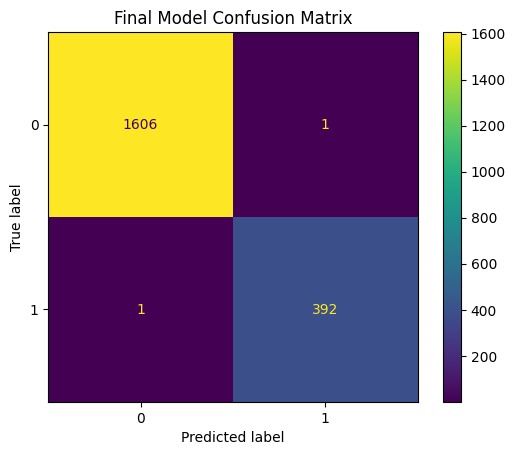

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("Final Model Confusion Matrix")
plt.show()

In [17]:
# cross-validation
cv_scores = cross_val_score(final_model, X_train, y_train, cv=5, scoring='f1')


print("Cross-Validation F1 Scores for each fold:", cv_scores)
print(f"Mean CV F1-Score: {cv_scores.mean():.4f}")
print(f"Train F1-Score: {train_f1:.4f}, Test F1-Score: {test_f1:.4f}")

Cross-Validation F1 Scores for each fold: [0.9969697  0.99546142 0.99847793 0.99393939 0.99696049]
Mean CV F1-Score: 0.9964
Train F1-Score: 0.9964, Test F1-Score: 0.9975


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1406: DataC

### Overfitting / Validation Check
- Train F1: 0.9964, Test F1: 0.9975  
- Train ROC-AUC: 0.9964, Test ROC-AUC: 0.9975  
- Cross-validation shows stable F1 across folds 

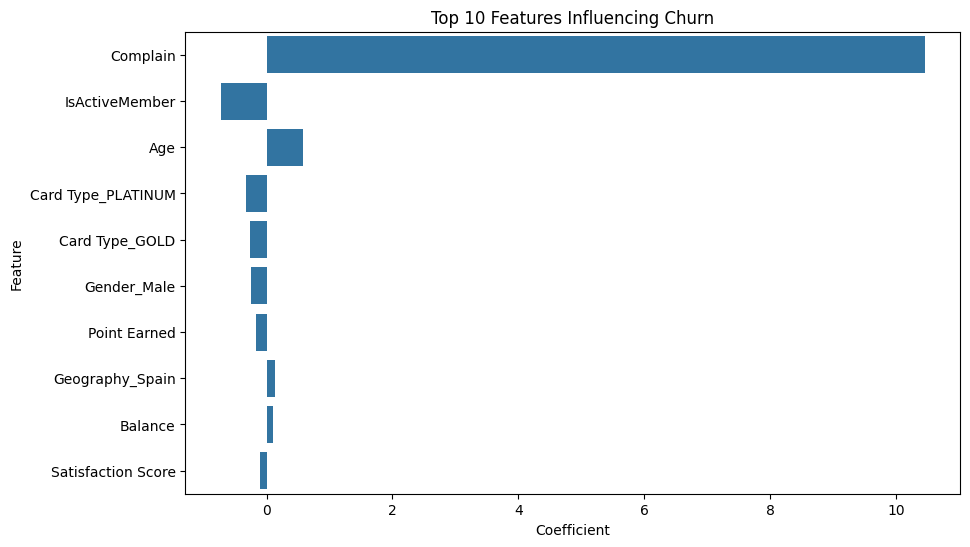

In [18]:
# Feature Importance (for Logistic Regression)
feature_importance = pd.DataFrame({
    'Feature': X_test.columns,
    'Coefficient': final_model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(10))
plt.title("Top 10 Features Influencing Churn")
plt.show()



### Feature Importance
- Top features driving churn are plotted above  
- These features can guide **targeted retention campaigns**

In [20]:
# Identify High-Risk Customers
X_test['Predicted_Prob'] = y_test_prob
X_test['Predicted_Churn'] = y_test_pred

high_risk_customers = X_test.sort_values(by='Predicted_Prob', ascending=False).head(10)
high_risk_customers

# Save high-risk customers
high_risk_customers.to_csv("../data/high_risk_customers.csv", index=False)
high_risk_customers


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Gender_Male,Geography_Germany,Geography_Spain,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Predicted_Prob,Predicted_Churn
1450,-2.030378,2.291460,-1.389442,1.428956,0.808436,0,0,0.701148,1,-1.432186,-1.172618,False,False,False,False,False,True,0.998687,1
1232,2.058448,3.052039,1.733777,-0.103975,-0.916688,1,0,-0.044125,1,-0.720010,0.796809,True,False,True,False,False,True,0.998431,1
679,1.228229,2.956967,1.386753,0.554569,-0.916688,1,0,-1.352066,1,-0.007834,-0.621356,False,False,False,False,True,False,0.998402,1
1540,-1.459603,2.576677,-0.348369,-1.218471,-0.916688,1,0,-1.717598,1,1.416518,-0.256812,False,False,True,False,False,True,0.998398,1
1149,-0.411452,2.291460,-1.042418,0.889043,0.808436,1,0,0.376913,1,0.704342,0.156634,False,False,True,False,False,True,0.998145,1
1924,1.518806,2.006242,0.345680,0.333893,-0.916688,1,0,-1.191402,1,-1.432186,0.427819,False,False,False,False,False,True,0.998048,1
1313,1.103696,2.101315,1.039728,0.789263,-0.916688,1,0,1.421409,1,-1.432186,-0.305715,False,True,False,False,False,False,0.998014,1
1861,2.058448,2.956967,-1.389442,0.333756,2.533560,1,0,-0.663272,1,1.416518,-1.074814,False,True,False,True,False,False,0.997782,1
1194,0.263100,1.625953,-1.736467,0.702263,-0.916688,0,0,1.006594,1,-0.720010,-0.376845,False,False,False,False,False,True,0.997767,1
767,0.491410,2.386532,1.386753,0.592525,-0.916688,1,0,-1.259673,1,-0.720010,0.801255,True,False,False,False,False,True,0.997712,1


### High-Risk Customers
- Table and bar chart show **top 10 customers most likely to churn**  
- These customers should be prioritized for **proactive retention strategies**

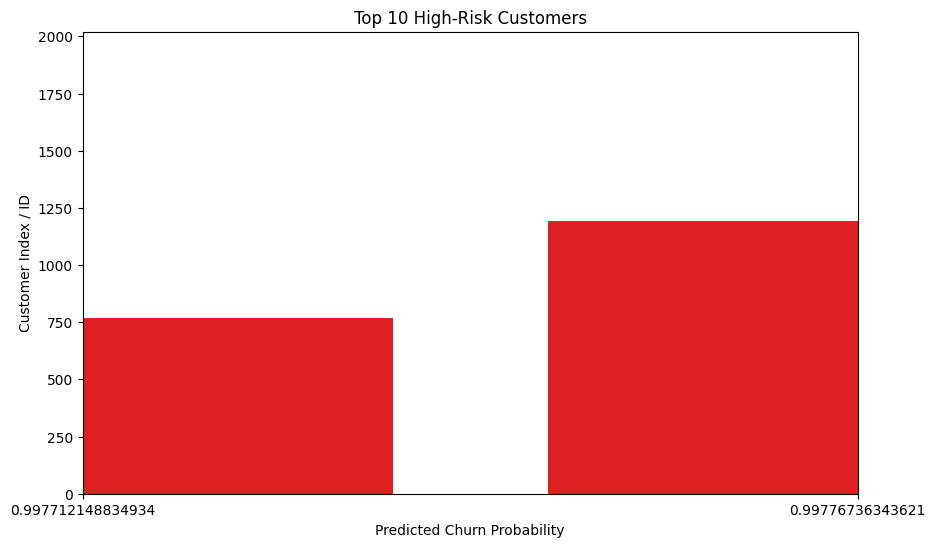

In [23]:
# Bar chart of high-risk customers
plt.figure(figsize=(10,6))
sns.barplot(
    x='Predicted_Prob', 
    y=high_risk_customers.index,  # use 'CustomerId' if available
    data=high_risk_customers,
    color='red'
)
plt.xlabel("Predicted Churn Probability")
plt.ylabel("Customer Index / ID")
plt.title("Top 10 High-Risk Customers")
plt.xlim(0, 1)
plt.show()

### Recommendations
1. Focus retention campaigns on **high-risk segments** identified by the model.  
2. Improve services/features correlated with high churn (e.g., satisfaction, number of products).  
3. Periodically retrain the model with **new customer data** to maintain performance.

### Limitations & Future Work
- Extremely high metrics may indicate the dataset is easy to predict; monitor performance on new data.  
- Explore additional features or external data for better generalization.  
- Consider deploying the model for **real-time churn scoring**.
